In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes

In [3]:
data = pd.read_csv('C:/Users/atirkey/OneDrive/airflow/cleaned_data.csv')

In [4]:
clustering_columns = ['STATE', 'STORE_TYPE', 'AREA']
clustering_data = data[clustering_columns]

In [5]:
geographical_coordinates = {
    "W.A": {"Latitude": -25.042261, "Longitude": 117.793221},
    "N.T": {"Latitude": -19.491411, "Longitude": 132.550964},
    "S.A": {"Latitude": -30.000233, "Longitude": 136.209152},
    "QLD": {"Latitude": -20.917574, "Longitude": 142.702789},
    "NSW": {"Latitude": -31.840233, "Longitude": 145.612793},
    "ACT": {"Latitude": -35.473469, "Longitude": 149.012375},
    "VIC": {"Latitude": -37.020100, "Longitude": 144.964600},
    "TAS": {"Latitude": -41.640079, "Longitude": 146.315918}
}

In [6]:
clustering_data['Latitude'] = clustering_data['STATE'].map(lambda x: geographical_coordinates[x]['Latitude'])
clustering_data['Longitude'] = clustering_data['STATE'].map(lambda x: geographical_coordinates[x]['Longitude'])

C:\Users\atirkey\AppData\Local\Temp\ipykernel_22272\2560517015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Latitude'] = clustering_data['STATE'].map(lambda x: geographical_coordinates[x]['Latitude'])
C:\Users\atirkey\AppData\Local\Temp\ipykernel_22272\2560517015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Longitude'] = clustering_data['STATE'].map(lambda x: geographical_coordinates[x]['Longitude'])


In [7]:
clustering_data = pd.get_dummies(clustering_data, columns=['STORE_TYPE', 'AREA'])

In [8]:
inertia = []
for k in range(1, 11):
    kmodes = KModes(n_clusters=k, init='Huang', random_state=42)
    kmodes.fit(clustering_data)
    inertia.append(kmodes.cost_)

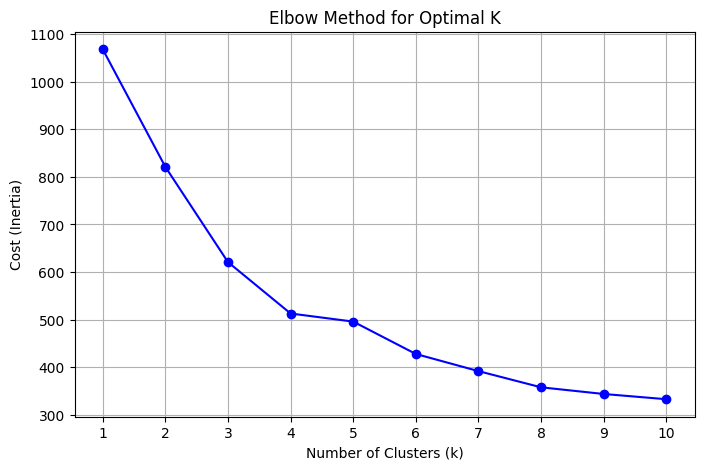

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [10]:
optimal_k = 4
kmodes = KModes(n_clusters=optimal_k, init='Huang', random_state=42)
clustering_data['Cluster'] = kmodes.fit_predict(clustering_data)

In [14]:
data['Cluster'] = clustering_data['Cluster']

In [ ]:
data.to_csv('geo.csv', index=False)

In [15]:
cluster_state_distribution = data.groupby(['Cluster', 'STATE']).size().unstack(fill_value=0)

print("Cluster-State Distribution:")
print(cluster_state_distribution)


Cluster-State Distribution:
STATE    ACT  N.T  NSW  QLD  S.A  TAS  VIC  W.A
Cluster                                        
0          3    4   86    0   21    5    0    0
1          0    0    0    0    0    0    0   36
2          0    0    0    0    0    0   82    0
3          0    0    0   67    0    0    0    0


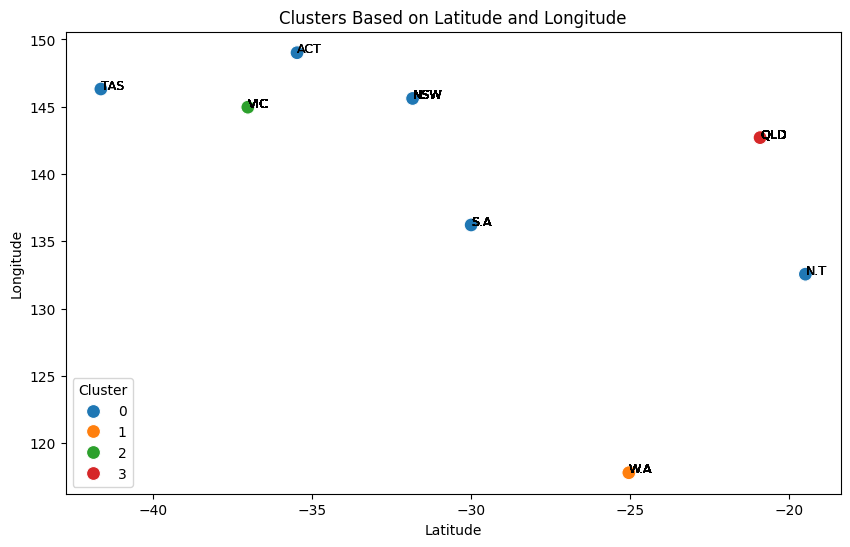

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Latitude', y='Longitude', hue='Cluster', data=clustering_data, palette='tab10', s=100
)
for i, state in enumerate(data['STATE']):
    plt.text(clustering_data['Latitude'].iloc[i], clustering_data['Longitude'].iloc[i], state, fontsize=9)

plt.title('Clusters Based on Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(title='Cluster')
plt.show()
